In [ ]:
!pip install ml_metrics
!pip install seaborn
!pip install statsmodels
from pandas import read_csv, DataFrame,read_excel
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-cp36-none-any.whl size=7850 sha256=aef432aaddb24c4891ed4f15ef3c431a0408e1abd57aed99121d4c285de6c205
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built ml-metrics


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import math
from math import sqrt


In [ ]:
from google.colab import files
TS = files.upload()
TS = read_excel('sberbank-moscow-exchange.xlsx')
TS.columns = ['Date','Bid','Ask','Price open','Price min','Price max','Price last','Price avg',' Turnover ','Amount of deals']

TS['Date'] =pd.to_datetime(TS.Date,dayfirst=True)

TS.head()



Saving sberbank-moscow-exchange.xlsx to sberbank-moscow-exchange.xlsx


,Date,Bid,Ask,Price open,Price min,Price max,Price last,Price avg,Turnover,Amount of deals
0,2020-01-31,252.40,252.45,258.5,252.17,259.20,252.20,255.62,12249844290,56369
1,2020-01-30,256.80,256.93,258.0,255.27,258.69,257.31,257.08,8167114682,44014
2,2020-01-29,259.40,259.50,258.4,257.61,261.57,259.94,259.59,9099376950,49133
3,2020-01-28,257.70,257.71,257.0,254.10,258.84,257.70,256.88,12365444789,55157
4,2020-01-27,257.17,257.27,261.0,255.32,262.10,255.32,258.13,14583044307,75959


In [ ]:
TS['index1'] = TS.index
TS=TS.sort_values(by='index1',ascending=False) 

TS=TS.set_index('Date')
TS=TS.drop(['index1'],axis=1)
TS.head()

,Bid,Ask,Price open,Price min,Price max,Price last,Price avg,Turnover,Amount of deals
Date,,,,,,,,,
2008-01-09,101.77,101.85,101.98,100.72,103.70,101.85,101.91,4364999360,12830
2008-01-10,103.47,103.53,102.23,101.53,103.81,103.53,102.82,4215018206,18254
2008-01-11,104.60,104.70,103.54,102.86,105.45,104.70,104.49,3451371236,16709
2008-01-14,105.00,105.04,104.41,104.20,105.30,105.00,104.77,2624061063,10755
2008-01-15,105.59,105.70,105.35,104.80,106.60,105.71,105.85,5476584658,17807


In [ ]:
from google.colab import files
index = files.upload()
index = read_csv('index.csv',',', index_col=['Date'], parse_dates=['Date'], dayfirst=True)
index.head()

Saving index.csv to index.csv


,USD/RUB open,USD/RUB last,Brent open,Brent last,MMVB open,MMVB last,S&P 500 open,S&P 500 last
Date,,,,,,,,
2008-01-09,24.46,24.48,95.55,94.37,1888.86,1906.86,1390.25,1409.13
2008-01-10,24.48,24.36,94.49,92.22,1906.86,1912.29,1406.78,1420.33
2008-01-11,24.35,24.35,92.85,91.07,1912.29,1914.48,1419.91,1401.02
2008-01-14,24.37,24.28,91.07,92.92,1914.48,1931.14,1402.91,1416.25
2008-01-15,24.29,24.31,92.90,90.98,1931.14,1921.38,1411.88,1380.95


In [ ]:
data=index.join(TS)
data

,USD/RUB open,USD/RUB last,Brent open,Brent last,MMVB open,MMVB last,S&P 500 open,S&P 500 last,Bid,Ask,Price open,Price min,Price max,Price last,Price avg,Turnover,Amount of deals
Date,,,,,,,,,,,,,,,,,
2008-01-09,24.46,24.48,95.55,94.37,1888.86,1906.86,1390.25,1409.13,101.77,101.85,101.98,100.72,103.70,101.85,101.91,4364999360,12830
2008-01-10,24.48,24.36,94.49,92.22,1906.86,1912.29,1406.78,1420.33,103.47,103.53,102.23,101.53,103.81,103.53,102.82,4215018206,18254
2008-01-11,24.35,24.35,92.85,91.07,1912.29,1914.48,1419.91,1401.02,104.60,104.70,103.54,102.86,105.45,104.70,104.49,3451371236,16709
2008-01-14,24.37,24.28,91.07,92.92,1914.48,1931.14,1402.91,1416.25,105.00,105.04,104.41,104.20,105.30,105.00,104.77,2624061063,10755
2008-01-15,24.29,24.31,92.90,90.98,1931.14,1921.38,1411.88,1380.95,105.59,105.70,105.35,104.80,106.60,105.71,105.85,5476584658,17807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,62.09,62.98,60.23,59.32,3123.71,3085.16,3247.16,3243.63,257.17,257.27,261.00,255.32,262.10,255.32,258.13,14583044307,75959
2020-01-28,62.98,62.28,59.03,59.51,3097.71,3113.10,3255.35,3276.24,257.70,257.71,257.00,254.10,258.84,257.70,256.88,12365444789,55157
2020-01-29,62.28,62.55,59.86,59.81,3125.91,3128.80,3289.46,3273.40,259.40,259.50,258.40,257.61,261.57,259.94,259.59,9099376950,49133


In [ ]:
data=data.dropna()
data2=data.copy()

In [ ]:
#data=data['2017-02-01':]

data

,USD/RUB open,USD/RUB last,Brent open,Brent last,MMVB open,MMVB last,S&P 500 open,S&P 500 last,Bid,Ask,Price open,Price min,Price max,Price last,Price avg,Turnover,Amount of deals
Date,,,,,,,,,,,,,,,,,
2008-01-09,24.46,24.48,95.55,94.37,1888.86,1906.86,1390.25,1409.13,101.77,101.85,101.98,100.72,103.70,101.85,101.91,4364999360,12830
2008-01-10,24.48,24.36,94.49,92.22,1906.86,1912.29,1406.78,1420.33,103.47,103.53,102.23,101.53,103.81,103.53,102.82,4215018206,18254
2008-01-11,24.35,24.35,92.85,91.07,1912.29,1914.48,1419.91,1401.02,104.60,104.70,103.54,102.86,105.45,104.70,104.49,3451371236,16709
2008-01-14,24.37,24.28,91.07,92.92,1914.48,1931.14,1402.91,1416.25,105.00,105.04,104.41,104.20,105.30,105.00,104.77,2624061063,10755
2008-01-15,24.29,24.31,92.90,90.98,1931.14,1921.38,1411.88,1380.95,105.59,105.70,105.35,104.80,106.60,105.71,105.85,5476584658,17807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,62.09,62.98,60.23,59.32,3123.71,3085.16,3247.16,3243.63,257.17,257.27,261.00,255.32,262.10,255.32,258.13,14583044307,75959
2020-01-28,62.98,62.28,59.03,59.51,3097.71,3113.10,3255.35,3276.24,257.70,257.71,257.00,254.10,258.84,257.70,256.88,12365444789,55157
2020-01-29,62.28,62.55,59.86,59.81,3125.91,3128.80,3289.46,3273.40,259.40,259.50,258.40,257.61,261.57,259.94,259.59,9099376950,49133


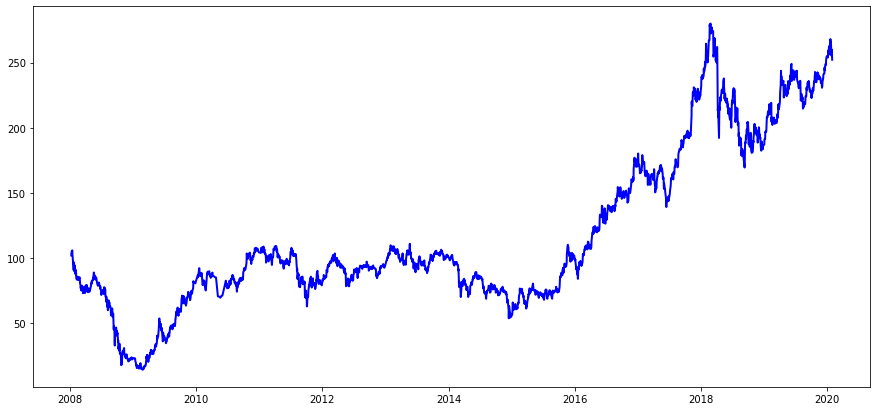

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data.index,data['Price last'], "g", label="Price open", linewidth=2.0,color='blue')

## Предобработка данных 

In [ ]:
for col in data.columns: 
    print(col)

USD/RUB open
USD/RUB last
Brent open
Brent last
 MMVB open 
 MMVB last 
 S&P 500 open 
 S&P 500 last 
Bid
Ask
Price open
Price min
Price max
Price last
Price avg
 Turnover 
Amount of deals


In [ ]:
# Создаём лаги переменных
for i in range(1, 5):
    data["lag_pl_{}".format(i)] = data ["Price last"].shift(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in range(1, 5):
    data["lag_bid_{}".format(i)] = data ["Bid"].shift(i)
    data["lag_ask_{}".format(i)] = data ["Ask"].shift(i)
    data["lag_po_{}".format(i)] = data ["Price open"].shift(i)
    data["lag_min_{}".format(i)] = data ["Price min"].shift(i)
    data["lag_max_{}".format(i)] = data ["Price max"].shift(i)
    data["lag_avg_{}".format(i)] = data ["Price avg"].shift(i)
    data["lag_turn_{}".format(i)] = data [" Turnover "].shift(i)
    data["lag_ad_{}".format(i)] = data ["Amount of deals"].shift(i)
    data["lag_MMVB_o_{}".format(i)] = data [" MMVB open "].shift(i)
    data["lag_MMVB_l_{}".format(i)] = data [" MMVB last "].shift(i)
    data["lag_usd_o_{}".format(i)] = data ["USD/RUB open"].shift(i)
    data["lag_usd_l_{}".format(i)] = data ["USD/RUB last"].shift(i)
    data["lag_brent_o_{}".format(i)] = data ["Brent open"].shift(i)
    data["lag_brent_l_{}".format(i)] = data ["Brent last"].shift(i)
    data["lag_s&p_last{}".format(i)] = data [" S&P 500 last "].shift(i)
    data["lag_s&p_open{}".format(i)] = data [" S&P 500 open "].shift(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
data.head()

,USD/RUB open,USD/RUB last,Brent open,Brent last,MMVB open,MMVB last,S&P 500 open,S&P 500 last,Bid,Ask,Price open,Price min,Price max,Price last,Price avg,Turnover,Amount of deals,lag_pl_1,lag_pl_2,lag_pl_3,lag_pl_4,lag_bid_1,lag_ask_1,lag_po_1,lag_min_1,lag_max_1,lag_avg_1,lag_turn_1,lag_ad_1,lag_MMVB_o_1,lag_MMVB_l_1,lag_usd_o_1,lag_usd_l_1,lag_brent_o_1,lag_brent_l_1,lag_s&p_last1,lag_s&p_open1,lag_bid_2,lag_ask_2,lag_po_2,...,lag_MMVB_o_2,lag_MMVB_l_2,lag_usd_o_2,lag_usd_l_2,lag_brent_o_2,lag_brent_l_2,lag_s&p_last2,lag_s&p_open2,lag_bid_3,lag_ask_3,lag_po_3,lag_min_3,lag_max_3,lag_avg_3,lag_turn_3,lag_ad_3,lag_MMVB_o_3,lag_MMVB_l_3,lag_usd_o_3,lag_usd_l_3,lag_brent_o_3,lag_brent_l_3,lag_s&p_last3,lag_s&p_open3,lag_bid_4,lag_ask_4,lag_po_4,lag_min_4,lag_max_4,lag_avg_4,lag_turn_4,lag_ad_4,lag_MMVB_o_4,lag_MMVB_l_4,lag_usd_o_4,lag_usd_l_4,lag_brent_o_4,lag_brent_l_4,lag_s&p_last4,lag_s&p_open4
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-09,24.46,24.48,95.55,94.37,1888.86,1906.86,1390.25,1409.13,101.77,101.85,101.98,100.72,103.70,101.85,101.91,4364999360,12830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-10,24.48,24.36,94.49,92.22,1906.86,1912.29,1406.78,1420.33,103.47,103.53,102.23,101.53,103.81,103.53,102.82,4215018206,18254,101.85,NaN,NaN,NaN,101.77,101.85,101.98,100.72,103.70,101.91,4.364999e+09,12830.0,1888.86,1906.86,24.46,24.48,95.55,94.37,1409.13,1390.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-11,24.35,24.35,92.85,91.07,1912.29,1914.48,1419.91,1401.02,104.60,104.70,103.54,102.86,105.45,104.70,104.49,3451371236,16709,103.53,101.85,NaN,NaN,103.47,103.53,102.23,101.53,103.81,102.82,4.215018e+09,18254.0,1906.86,1912.29,24.48,24.36,94.49,92.22,1420.33,1406.78,101.77,101.85,101.98,...,1888.86,1906.86,24.46,24.48,95.55,94.37,1409.13,1390.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-14,24.37,24.28,91.07,92.92,1914.48,1931.14,1402.91,1416.25,105.00,105.04,104.41,104.20,105.30,105.00,104.77,2624061063,10755,104.70,103.53,101.85,NaN,104.60,104.70,103.54,102.86,105.45,104.49,3.451371e+09,16709.0,1912.29,1914.48,24.35,24.35,92.85,91.07,1401.02,1419.91,103.47,103.53,102.23,...,1906.86,1912.29,24.48,24.36,94.49,92.22,1420.33,1406.78,101.77,101.85,101.98,100.72,103.70,101.91,4.364999e+09,12830.0,1888.86,1906.86,24.46,24.48,95.55,94.37,1409.13,1390.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-15,24.29,24.31,92.90,90.98,1931.14,1921.38,1411.88,1380.95,105.59,105.70,105.35,104.80,106.60,105.71,105.85,5476584658,17807,105.00,104.70,103.53,101.85,105.00,105.04,104.41,104.20,105.30,104.77,2.624061e+09,10755.0,1914.48,1931.14,24.37,24.28,91.07,92.92,1416.25,1402.91,104.60,104.70,103.54,...,1912.29,1914.48,24.35,24.35,92.85,91.07,1401.02,1419.91,103.47,103.53,102.23,101.53,103.81,102.82,4.215018e+09,18254.0,1906.86,1912.29,24.48,24.36,94.49,92.22,1420.33,1406.78,101.77,101.85,101.98,100.72,103.7,101.91,4.364999e+09,12830.0,1888.86,1906.86,24.46,24.48,95.55,94.37,1409.13,1390.25


In [ ]:
#Формируем факторные и результирующую переменную, убираем NA от лагов
data=data.dropna()
X = data.drop(['Price last','Bid','Ask','Price min','Price max','Price avg',' Turnover ','Amount of deals',' MMVB last ',' S&P 500 open ',' S&P 500 last ','USD/RUB last','Brent last'],axis=1)
Y = data['Price last']


X2=X.copy()
X.head()

,USD/RUB open,Brent open,MMVB open,Price open,lag_pl_1,lag_pl_2,lag_pl_3,lag_pl_4,lag_bid_1,lag_ask_1,lag_po_1,lag_min_1,lag_max_1,lag_avg_1,lag_turn_1,lag_ad_1,lag_MMVB_o_1,lag_MMVB_l_1,lag_usd_o_1,lag_usd_l_1,lag_brent_o_1,lag_brent_l_1,lag_s&p_last1,lag_s&p_open1,lag_bid_2,lag_ask_2,lag_po_2,lag_min_2,lag_max_2,lag_avg_2,lag_turn_2,lag_ad_2,lag_MMVB_o_2,lag_MMVB_l_2,lag_usd_o_2,lag_usd_l_2,lag_brent_o_2,lag_brent_l_2,lag_s&p_last2,lag_s&p_open2,lag_bid_3,lag_ask_3,lag_po_3,lag_min_3,lag_max_3,lag_avg_3,lag_turn_3,lag_ad_3,lag_MMVB_o_3,lag_MMVB_l_3,lag_usd_o_3,lag_usd_l_3,lag_brent_o_3,lag_brent_l_3,lag_s&p_last3,lag_s&p_open3,lag_bid_4,lag_ask_4,lag_po_4,lag_min_4,lag_max_4,lag_avg_4,lag_turn_4,lag_ad_4,lag_MMVB_o_4,lag_MMVB_l_4,lag_usd_o_4,lag_usd_l_4,lag_brent_o_4,lag_brent_l_4,lag_s&p_last4,lag_s&p_open4
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-15,24.29,92.90,1931.14,105.35,105.00,104.70,103.53,101.85,105.00,105.04,104.41,104.20,105.30,104.77,2.624061e+09,10755.0,1914.48,1931.14,24.37,24.28,91.07,92.92,1416.25,1402.91,104.60,104.70,103.54,102.86,105.45,104.49,3.451371e+09,16709.0,1912.29,1914.48,24.35,24.35,92.85,91.07,1401.02,1419.91,103.47,103.53,102.23,101.53,103.81,102.82,4.215018e+09,18254.0,1906.86,1912.29,24.48,24.36,94.49,92.22,1420.33,1406.78,101.77,101.85,101.98,100.72,103.70,101.91,4.364999e+09,12830.0,1888.86,1906.86,24.46,24.48,95.55,94.37,1409.13,1390.25
2008-01-16,24.35,90.94,1921.38,104.20,105.71,105.00,104.70,103.53,105.59,105.70,105.35,104.80,106.60,105.85,5.476585e+09,17807.0,1931.14,1921.38,24.29,24.31,92.90,90.98,1380.95,1411.88,105.00,105.04,104.41,104.20,105.30,104.77,2.624061e+09,10755.0,1914.48,1931.14,24.37,24.28,91.07,92.92,1416.25,1402.91,104.60,104.70,103.54,102.86,105.45,104.49,3.451371e+09,16709.0,1912.29,1914.48,24.35,24.35,92.85,91.07,1401.02,1419.91,103.47,103.53,102.23,101.53,103.81,102.82,4.215018e+09,18254.0,1906.86,1912.29,24.48,24.36,94.49,92.22,1420.33,1406.78
2008-01-17,24.48,89.60,1839.04,102.20,101.80,105.71,105.00,104.70,101.80,101.95,104.20,100.02,104.50,101.99,6.991800e+09,23501.0,1921.38,1839.04,24.35,24.48,90.94,89.75,1373.20,1377.41,105.59,105.70,105.35,104.80,106.60,105.85,5.476585e+09,17807.0,1931.14,1921.38,24.29,24.31,92.90,90.98,1380.95,1411.88,105.00,105.04,104.41,104.20,105.30,104.77,2.624061e+09,10755.0,1914.48,1931.14,24.37,24.28,91.07,92.92,1416.25,1402.91,104.60,104.70,103.54,102.86,105.45,104.49,3.451371e+09,16709.0,1912.29,1914.48,24.35,24.35,92.85,91.07,1401.02,1419.91
2008-01-18,24.49,88.50,1793.07,100.50,101.00,101.80,105.71,105.00,101.01,101.09,102.20,99.25,102.80,100.76,7.666823e+09,23954.0,1839.04,1805.42,24.48,24.45,89.60,88.75,1333.25,1374.79,101.80,101.95,104.20,100.02,104.50,101.99,6.991800e+09,23501.0,1921.38,1839.04,24.35,24.48,90.94,89.75,1373.20,1377.41,105.59,105.70,105.35,104.80,106.60,105.85,5.476585e+09,17807.0,1931.14,1921.38,24.29,24.31,92.90,90.98,1380.95,1411.88,105.00,105.04,104.41,104.20,105.30,104.77,2.624061e+09,10755.0,1914.48,1931.14,24.37,24.28,91.07,92.92,1416.25,1402.91
2008-01-22,24.74,87.38,1630.61,86.40,98.80,101.00,101.80,105.71,98.72,98.80,100.50,97.35,100.75,98.91,7.452115e+09,22941.0,1793.07,1788.34,24.49,24.51,88.50,89.23,1325.19,1333.90,101.01,101.09,102.20,99.25,102.80,100.76,7.666823e+09,23954.0,1839.04,1805.42,24.48,24.45,89.60,88.75,1333.25,1374.79,101.80,101.95,104.20,100.02,104.50,101.99,6.991800e+09,23501.0,1921.38,1839.04,24.35,24.48,90.94,89.75,1373.20,1377.41,105.59,105.70,105.35,104.80,106.60,105.85,5.476585e+09,17807.0,1931.14,1921.38,24.29,24.31,92.90,90.98,1380.95,1411.88


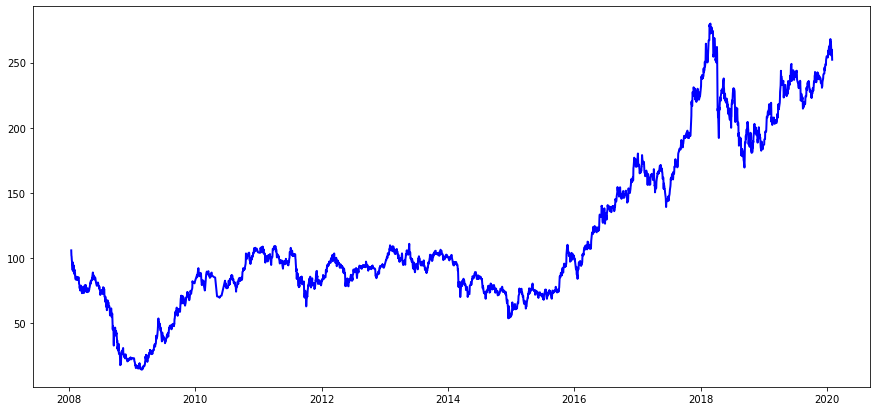

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(Y.index,Y, "g", label="Price open", linewidth=2.0,color='blue')

## Feature engineering

In [ ]:
for col in X.columns: 
    print(col)

USD/RUB open
Brent open
 MMVB open 
Price open
lag_pl_1
lag_pl_2
lag_pl_3
lag_pl_4
lag_bid_1
lag_ask_1
lag_po_1
lag_min_1
lag_max_1
lag_avg_1
lag_turn_1
lag_ad_1
lag_MMVB_o_1
lag_MMVB_l_1
lag_usd_o_1
lag_usd_l_1
lag_brent_o_1
lag_brent_l_1
lag_s&p_last1
lag_s&p_open1
lag_bid_2
lag_ask_2
lag_po_2
lag_min_2
lag_max_2
lag_avg_2
lag_turn_2
lag_ad_2
lag_MMVB_o_2
lag_MMVB_l_2
lag_usd_o_2
lag_usd_l_2
lag_brent_o_2
lag_brent_l_2
lag_s&p_last2
lag_s&p_open2
lag_bid_3
lag_ask_3
lag_po_3
lag_min_3
lag_max_3
lag_avg_3
lag_turn_3
lag_ad_3
lag_MMVB_o_3
lag_MMVB_l_3
lag_usd_o_3
lag_usd_l_3
lag_brent_o_3
lag_brent_l_3
lag_s&p_last3
lag_s&p_open3
lag_bid_4
lag_ask_4
lag_po_4
lag_min_4
lag_max_4
lag_avg_4
lag_turn_4
lag_ad_4
lag_MMVB_o_4
lag_MMVB_l_4
lag_usd_o_4
lag_usd_l_4
lag_brent_o_4
lag_brent_l_4
lag_s&p_last4
lag_s&p_open4


In [ ]:
#Rolling mean
X['rolling_mean'] = X['Price open'].rolling(window=7).mean()


#Абсолютный прирост
X['Price open abs']=X['Price open']-X["Price open"].shift(1)
X['Price open/last abs']=X['Price open']-X["lag_pl_1"]

X['USD/RUB open abs']=X['USD/RUB open']-X["USD/RUB open"].shift(1)
X['USD/RUB open/last abs']=X['USD/RUB open']-X["lag_usd_l_1"]

X['Brent open abs']=X['Brent open']-X["Brent open"].shift(1)
X['Brent open/last abs']=X['Brent open']-X["lag_brent_l_1"]

X['MMVB open abs']=X[' MMVB open ']-X[" MMVB open "].shift(1)
X['MMVB open/last abs']=X[' MMVB open ']-X["lag_MMVB_l_1"]


#Относительный прирост
X['Price open rel']=X['Price open']/X["Price open"].shift(1)
X['Price open/last rel']=X['Price open']/X["lag_pl_1"]

X['USD/RUB open rel']=X['USD/RUB open']/X["USD/RUB open"].shift(1)
X['USD/RUB open/last rel']=X['USD/RUB open']/X["lag_usd_l_1"]

X['Brent open rel']=X['Brent open']/X["Brent open"].shift(1)
X['Brent open/last rel']=X['Brent open']/X["lag_brent_l_1"]

X['MMVB open rel']=X[' MMVB open ']/X[" MMVB open "].shift(1)
X['MMVB open/last rel']=X[' MMVB open ']/X["lag_MMVB_l_1"]



In [ ]:
X=X.dropna()
X3=X.copy()

X.head()

,USD/RUB open,Brent open,MMVB open,Price open,lag_pl_1,lag_pl_2,lag_pl_3,lag_pl_4,lag_bid_1,lag_ask_1,lag_po_1,lag_min_1,lag_max_1,lag_avg_1,lag_turn_1,lag_ad_1,lag_MMVB_o_1,lag_MMVB_l_1,lag_usd_o_1,lag_usd_l_1,lag_brent_o_1,lag_brent_l_1,lag_s&p_last1,lag_s&p_open1,lag_bid_2,lag_ask_2,lag_po_2,lag_min_2,lag_max_2,lag_avg_2,lag_turn_2,lag_ad_2,lag_MMVB_o_2,lag_MMVB_l_2,lag_usd_o_2,lag_usd_l_2,lag_brent_o_2,lag_brent_l_2,lag_s&p_last2,lag_s&p_open2,...,lag_MMVB_l_3,lag_usd_o_3,lag_usd_l_3,lag_brent_o_3,lag_brent_l_3,lag_s&p_last3,lag_s&p_open3,lag_bid_4,lag_ask_4,lag_po_4,lag_min_4,lag_max_4,lag_avg_4,lag_turn_4,lag_ad_4,lag_MMVB_o_4,lag_MMVB_l_4,lag_usd_o_4,lag_usd_l_4,lag_brent_o_4,lag_brent_l_4,lag_s&p_last4,lag_s&p_open4,rolling_mean,Price open abs,Price open/last abs,USD/RUB open abs,USD/RUB open/last abs,Brent open abs,Brent open/last abs,MMVB open abs,MMVB open/last abs,Price open rel,Price open/last rel,USD/RUB open rel,USD/RUB open/last rel,Brent open rel,Brent open/last rel,MMVB open rel,MMVB open/last rel
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-24,24.66,87.40,1570.90,94.63,90.50,93.00,98.8,101.0,90.13,90.50,96.00,88.65,96.89,92.05,7.660552e+09,26021.0,1636.79,1570.90,24.63,24.73,88.25,86.62,1338.60,1310.41,92.98,93.0,86.40,75.01,99.40,91.46,1.145027e+10,32864.0,1630.61,1636.79,24.74,24.66,87.38,88.45,1310.50,1312.94,...,1788.34,24.49,24.51,88.50,89.23,1325.19,1333.90,101.01,101.09,102.20,99.25,102.80,100.76,7.666823e+09,23954.0,1839.04,1805.42,24.48,24.45,89.60,88.75,1333.25,1374.79,98.468571,-1.37,4.13,0.03,-0.07,-0.85,0.78,-65.89,0.0,0.985729,1.045635,1.001218,0.997169,0.990368,1.009005,0.959744,1.0
2008-01-25,24.46,89.44,1661.99,98.00,96.50,90.50,93.0,98.8,96.48,96.50,94.63,92.82,96.85,94.55,9.100582e+09,24996.0,1570.90,1661.99,24.66,24.49,87.40,89.07,1352.07,1340.13,90.13,90.5,96.00,88.65,96.89,92.05,7.660552e+09,26021.0,1636.79,1570.90,24.63,24.73,88.25,86.62,1338.60,1310.41,...,1636.79,24.74,24.66,87.38,88.45,1310.50,1312.94,98.72,98.80,100.50,97.35,100.75,98.91,7.452115e+09,22941.0,1793.07,1788.34,24.49,24.51,88.50,89.23,1325.19,1333.90,97.418571,3.37,1.50,-0.20,-0.03,2.04,0.37,91.09,0.0,1.035612,1.015544,0.991890,0.998775,1.023341,1.004154,1.057986,1.0
2008-01-28,24.49,90.70,1705.20,91.00,94.30,96.50,90.5,93.0,94.26,94.30,98.00,93.75,98.75,96.21,9.599089e+09,35188.0,1661.99,1705.20,24.46,24.50,89.44,90.90,1330.61,1357.32,96.48,96.5,94.63,92.82,96.85,94.55,9.100582e+09,24996.0,1570.90,1661.99,24.66,24.49,87.40,89.07,1352.07,1340.13,...,1570.90,24.63,24.73,88.25,86.62,1338.60,1310.41,92.98,93.00,86.40,75.01,99.40,91.46,1.145027e+10,32864.0,1630.61,1636.79,24.74,24.66,87.38,88.45,1310.50,1312.94,95.532857,-7.00,-3.30,0.03,-0.01,1.26,-0.20,43.21,0.0,0.928571,0.965005,1.001226,0.999592,1.014088,0.997800,1.025999,1.0
2008-01-29,24.47,91.55,1635.33,91.86,89.53,94.30,96.5,90.5,89.66,89.70,91.00,89.30,92.98,90.98,6.270528e+09,23960.0,1705.20,1635.33,24.49,24.48,90.70,91.38,1353.96,1330.70,94.26,94.3,98.00,93.75,98.75,96.21,9.599089e+09,35188.0,1661.99,1705.20,24.46,24.50,89.44,90.90,1330.61,1357.32,...,1661.99,24.66,24.49,87.40,89.07,1352.07,1340.13,90.13,90.50,96.00,88.65,96.89,92.05,7.660552e+09,26021.0,1636.79,1570.90,24.63,24.73,88.25,86.62,1338.60,1310.41,94.055714,0.86,2.33,-0.02,-0.01,0.85,0.17,-69.87,0.0,1.009451,1.026025,0.999183,0.999592,1.009372,1.001860,0.959025,1.0
2008-01-30,24.48,92.45,1678.42,93.61,94.21,89.53,94.3,96.5,94.21,94.47,91.86,90.60,94.74,92.30,7.106804e+09,25610.0,1635.33,1678.42,24.47,24.49,91.55,92.00,1362.30,1355.94,89.66,89.7,91.00,89.30,92.98,90.98,6.270528e+09,23960.0,1705.20,1635.33,24.49,24.48,90.70,91.38,1353.96,1330.70,...,1705.20,24.46,24.50,89.44,90.90,1330.61,1357.32,96.48,96.50,94.63,92.82,96.85,94.55,9.100582e+09,24996.0,1570.90,1661.99,24.66,24.49,87.40,89.07,1352.07,1340.13,93.071429,1.75,-0.60,0.01,-0.01,0.90,0.45,43.09,0.0,1.019051,0.993631,1.000409,0.999592,1.009831,1.004891,1.026349,1.0


In [ ]:
Y=Y.iloc[6:]
Y.head()

Date
2008-01-24    96.50
2008-01-25    94.30
2008-01-28    89.53
2008-01-29    94.21
2008-01-30    91.99
Name: Price last, dtype: float64

## Отбор переменных

In [ ]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,shuffle=False,test_size=0.3)
X_train=X[:'2018-02-28']
X_test=X['2018-03-01':'2018-09-11']
Y_train=Y[:'2018-02-28']
Y_test=Y['2018-03-01':'2018-09-11']
X_test.head()


X_train_ori=X_train
X_test_ori=X_test

## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,len(X.columns))            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,Y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,Y_train)
    score = model.score(X_test_rfe,Y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 33
Score with 33 features: 0.954586


In [ ]:
cols = list(X_train.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, nof)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,Y_train)  
#Fitting the data to model
model.fit(X_rfe,Y_train)              
temp = pd.Series(rfe.support_,index = cols)
features_rfe_LR = temp[temp==True].index
print(features_rfe_LR)

Index(['Price open', 'lag_pl_2', 'lag_pl_4', 'lag_bid_1', 'lag_ask_1',
       'lag_po_1', 'lag_avg_1', 'lag_usd_l_1', 'lag_bid_2', 'lag_usd_o_2',
       'lag_usd_l_2', 'lag_brent_o_2', 'lag_bid_3', 'lag_ask_3', 'lag_po_3',
       'lag_avg_3', 'lag_usd_l_3', 'lag_brent_l_3', 'lag_ask_4', 'lag_max_4',
       'lag_avg_4', 'Price open abs', 'Price open/last abs',
       'USD/RUB open/last abs', 'Brent open abs', 'Price open rel',
       'Price open/last rel', 'USD/RUB open rel', 'USD/RUB open/last rel',
       'Brent open rel', 'Brent open/last rel', 'MMVB open rel',
       'MMVB open/last rel'],
      dtype='object')


## Backward Elimination

In [ ]:
#Backward Elimination
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y_train,X_1.astype(float)).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
features_BE = cols
features_BE

[' MMVB open ',
 'Price open',
 'lag_pl_2',
 'lag_bid_1',
 'lag_ask_1',
 'lag_po_1',
 'lag_max_1',
 'lag_usd_l_1',
 'lag_brent_o_1',
 'lag_s&p_last1',
 'lag_bid_2',
 'lag_turn_2',
 'lag_MMVB_l_2',
 'lag_usd_o_2',
 'lag_s&p_last2',
 'lag_bid_3',
 'lag_po_3',
 'lag_avg_3',
 'lag_turn_3',
 'lag_usd_l_3',
 'lag_brent_l_3',
 'lag_MMVB_l_4',
 'Price open abs',
 'Brent open/last abs',
 'MMVB open/last abs',
 'Price open/last rel']

## SelectKBest

In [ ]:
#!pip install lightgbm
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

# feature extraction
test = SelectKBest(score_func=f_regression, k=5)
fit = test.fit(X_train, Y_train)

support = test.get_support()
features_KB = X_train.loc[:,support].columns.tolist()
print(str(len(features_KB)), 'selected features')

5 selected features


In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(len(features_KB),'Score'))  #print 10 best features

         Specs         Score
3   Price open  1.282608e+06
8    lag_bid_1  1.022484e+06
9    lag_ask_1  1.019899e+06
4     lag_pl_1  1.015127e+06
13   lag_avg_1  8.219994e+05


## Функции

In [ ]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0,color='blue')
    plt.plot(Y_test.values, label="actual", linewidth=2.0,color='magenta')
    
    if plot_intervals:

        mae = Y_train.mean() * (-1)
        deviation = Y_train.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(Y_test))
            anomalies[Y_test<lower] = Y_test[Y_test<lower]
            anomalies[Y_test>upper] = Y_test[Y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    #error1 = r2_score(prediction, Y_test)
    error2 = mean_absolute_percentage_error(prediction, Y_test)
    #plt.title("r2_score {0:.2f}%".format(error1))
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(error2))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [ ]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             Y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

## Linear Regression

In [ ]:
features_base=['Price open','lag_bid_1','lag_ask_1']

features=[features_KB, features_BE, features_rfe_LR,features_base]
mape_min=100000
best_features=0

for i in range(0,len(features)):
  
  X_train=X_train_ori[features[i]]
  X_test=X_test_ori[features[i]]
  lr2 = LinearRegression()
  lr2.fit(X_train, Y_train)
  prediction_lr2 = lr2.predict(X_test)
  mape = mean_absolute_percentage_error(prediction_lr2, Y_test)

  if (mape_min>mape):
     mape_min=mape
     best_features=features[i]
     
print(mape_min,best_features)

1.628613190086534 ['Price open', 'lag_pl_1', 'lag_bid_1', 'lag_ask_1', 'lag_avg_1']


In [ ]:
X_train=X_train_ori[best_features]
X_test=X_test_ori[best_features]

X_train.head()

,Price open,lag_pl_1,lag_bid_1,lag_ask_1,lag_avg_1
Date,,,,,
2008-01-24,94.63,90.50,90.13,90.50,92.05
2008-01-25,98.00,96.50,96.48,96.50,94.55
2008-01-28,91.00,94.30,94.26,94.30,96.21
2008-01-29,91.86,89.53,89.66,89.70,90.98
2008-01-30,93.61,94.21,94.21,94.47,92.30


In [ ]:
lr2 = LinearRegression()
lr2.fit(X_train, Y_train)
prediction_lr2 = lr2.predict(X_test)
mape = mean_absolute_percentage_error(prediction_lr2, Y_test)
print(mape)
#print (lr2.intercept_,lr2.coef_)

1.628613190086534


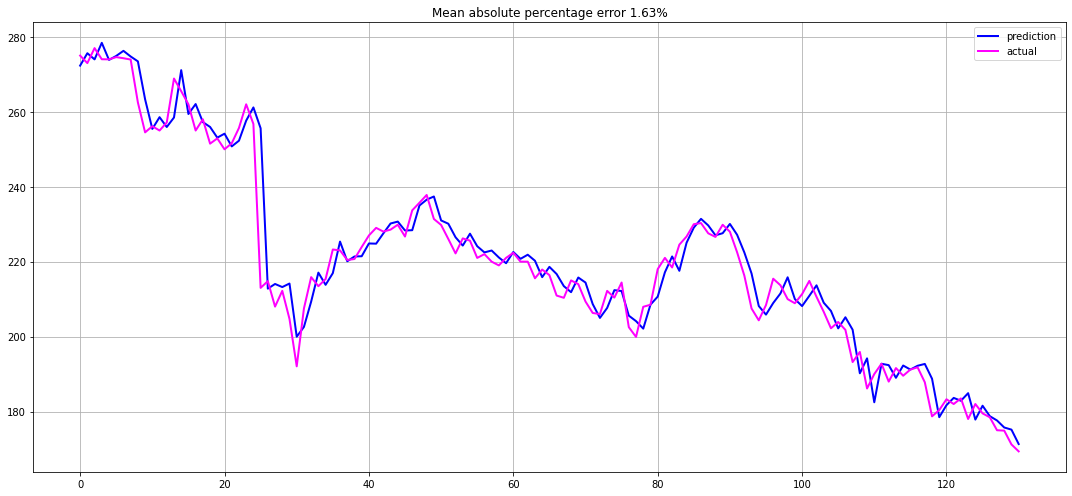

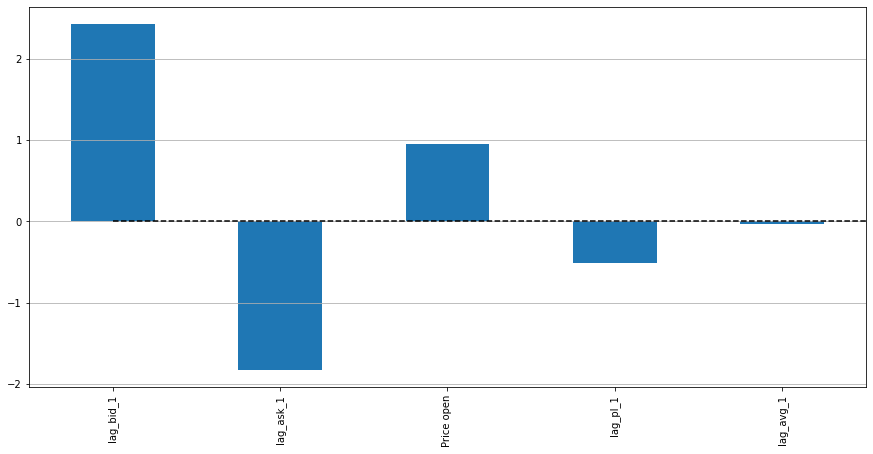

In [ ]:
plotModelResults(lr2, X_train=X_train, X_test=X_test,plot_intervals=False)
plotCoefficients(lr2)

## Ridge Regression

In [ ]:
X_train=X_train_ori[best_features]
X_test=X_test_ori[best_features]

X_train.head()

,Price open,lag_pl_1,lag_bid_1,lag_ask_1,lag_avg_1
Date,,,,,
2008-01-24,94.63,90.50,90.13,90.50,92.05
2008-01-25,98.00,96.50,96.48,96.50,94.55
2008-01-28,91.00,94.30,94.26,94.30,96.21
2008-01-29,91.86,89.53,89.66,89.70,90.98
2008-01-30,93.61,94.21,94.21,94.47,92.30


In [ ]:
from sklearn.linear_model import Ridge

# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, Y_train)

# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.980530990724769
STD:  0.01311948646914664




In [ ]:
# Grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  0.980534883491458
Best Params:  {'alpha': 10}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.5s finished


In [ ]:
alpha_best=grid_result.best_params_

alpha_best=alpha_best.values()
alpha_best=sum(alpha_best)
alpha_best

10

In [ ]:
ridge_best = Ridge(alpha=alpha_best).fit(X_train, Y_train)


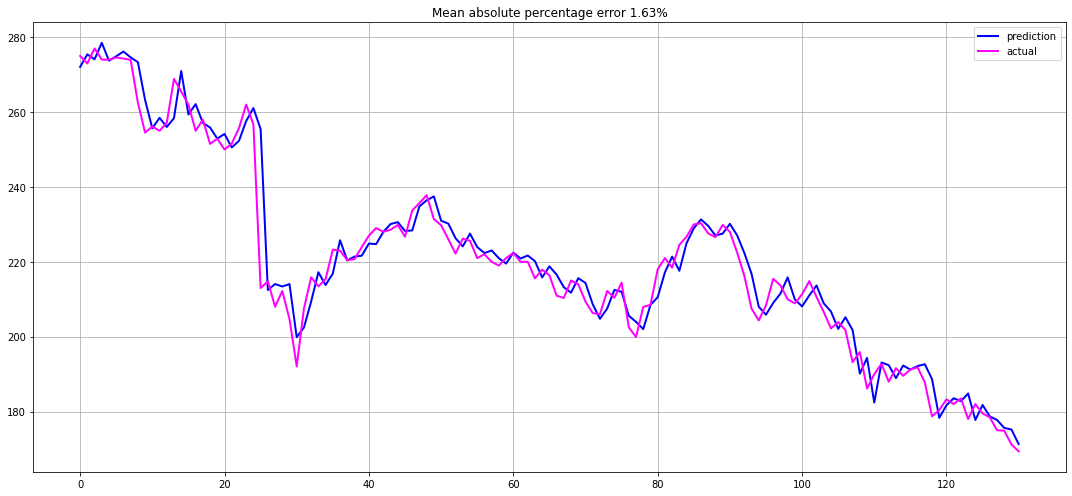

In [ ]:
plotModelResults(ridge_best, X_train=X_train, X_test=X_test,plot_intervals=False)

## Polynominal regression

In [ ]:
X_train=X_train_ori[['Price open','lag_bid_1','lag_ask_1']]
X_test=X_test_ori[['Price open','lag_bid_1','lag_ask_1']]

X_train.head()

,Price open,lag_bid_1,lag_ask_1
Date,,,
2008-01-24,94.63,90.13,90.50
2008-01-25,98.00,96.48,96.50
2008-01-28,91.00,94.26,94.30
2008-01-29,91.86,89.66,89.70
2008-01-30,93.61,94.21,94.47


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  mape_train = mean_absolute_percentage_error(Y_train, y_train_predicted)
 
    
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  mape_test = mean_absolute_percentage_error(Y_test, y_test_predict)


  create_polynomial_regression_model.y_test_predict= y_test_predict
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("MAPE of test set is {}".format(mape_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
  print("MAPE of test set is {}".format(mape_test))

In [ ]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 1.8621939810546855
R2 score of training set is 0.998186372528517
MAPE of test set is 1.7193229717761196


The model performance for the test set
-------------------------------------------
RMSE of test set is 5.784344184891309
R2 score of test set is 0.950239631047715
MAPE of test set is 1.732459098537388


In [ ]:
y_test_predict=create_polynomial_regression_model.y_test_predict

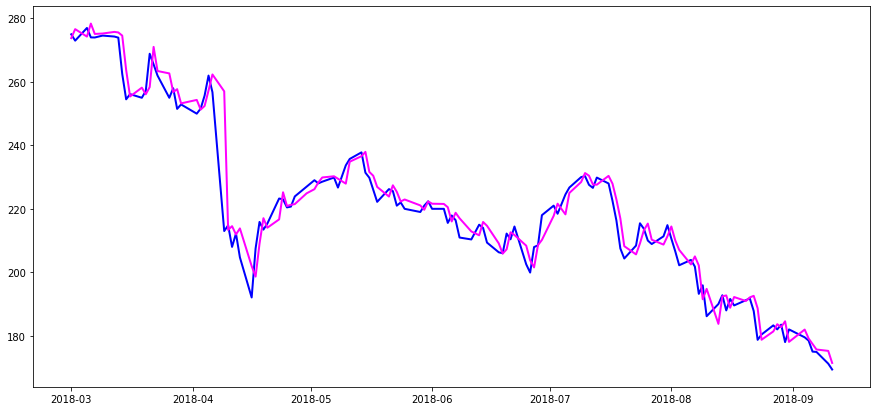

In [ ]:

plt.figure(figsize=(15, 7))
plt.plot(Y_test.index,Y_test, "g", label="test", linewidth=2.0,color='blue')
plt.plot(Y_test.index,y_test_predict, "g", label="predictions", linewidth=2.0,color='magenta')

## XGB

In [ ]:
X_train_ori = X_train_ori.apply(pd.to_numeric)
X_test_ori = X_test_ori.apply(pd.to_numeric)

features=[features_KB, features_BE, features_rfe_LR, features_base]
mape_min=100000
best_features=0

for i in range(0,len(features)):
  
  X_train=X_train_ori[features[i]]
  X_test=X_test_ori[features[i]]
  xgb2 = XGBRegressor()
  xgb2.fit(X_train, Y_train)
  prediction_xgb2 = xgb2.predict(X_test)
  mape = mean_absolute_percentage_error(prediction_xgb2, Y_test)

  if (mape_min>mape):
     mape_min=mape
     best_features=features[i]
     
print(mape_min,best_features)

[10:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2.072455277645501 ['Price open', 'lag_pl_1', 'lag_bid_1', 'lag_ask_1', 'lag_avg_1']


In [ ]:
X_train=X_train_ori[features_rfe_LR]
X_test=X_test_ori[features_rfe_LR]

X_train.head()

,Price open,lag_pl_2,lag_pl_4,lag_bid_1,lag_ask_1,lag_po_1,lag_avg_1,lag_usd_l_1,lag_bid_2,lag_usd_o_2,lag_usd_l_2,lag_brent_o_2,lag_bid_3,lag_ask_3,lag_po_3,lag_avg_3,lag_usd_l_3,lag_brent_l_3,lag_ask_4,lag_max_4,lag_avg_4,Price open abs,Price open/last abs,USD/RUB open/last abs,Brent open abs,Price open rel,Price open/last rel,USD/RUB open rel,USD/RUB open/last rel,Brent open rel,Brent open/last rel,MMVB open rel,MMVB open/last rel
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-24,94.63,93.00,101.0,90.13,90.50,96.00,92.05,24.73,92.98,24.74,24.66,87.38,98.72,98.8,100.50,98.91,24.51,89.23,101.09,102.80,100.76,-1.37,4.13,-0.07,-0.85,0.985729,1.045635,1.001218,0.997169,0.990368,1.009005,0.959744,1.0
2008-01-25,98.00,90.50,98.8,96.48,96.50,94.63,94.55,24.49,90.13,24.63,24.73,88.25,92.98,93.0,86.40,91.46,24.66,88.45,98.80,100.75,98.91,3.37,1.50,-0.03,2.04,1.035612,1.015544,0.991890,0.998775,1.023341,1.004154,1.057986,1.0
2008-01-28,91.00,96.50,93.0,94.26,94.30,98.00,96.21,24.50,96.48,24.66,24.49,87.40,90.13,90.5,96.00,92.05,24.73,86.62,93.00,99.40,91.46,-7.00,-3.30,-0.01,1.26,0.928571,0.965005,1.001226,0.999592,1.014088,0.997800,1.025999,1.0
2008-01-29,91.86,94.30,90.5,89.66,89.70,91.00,90.98,24.48,94.26,24.46,24.50,89.44,96.48,96.5,94.63,94.55,24.49,89.07,90.50,96.89,92.05,0.86,2.33,-0.01,0.85,1.009451,1.026025,0.999183,0.999592,1.009372,1.001860,0.959025,1.0
2008-01-30,93.61,89.53,96.5,94.21,94.47,91.86,92.30,24.49,89.66,24.49,24.48,90.70,94.26,94.3,98.00,96.21,24.50,90.90,96.50,96.85,94.55,1.75,-0.60,-0.01,0.90,1.019051,0.993631,1.000409,0.999592,1.009831,1.004891,1.026349,1.0


In [ ]:
xgb2 = XGBRegressor()
xgb2.fit(X_train, Y_train)
prediction_xgb2 = xgb2.predict(X_test)

[10:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


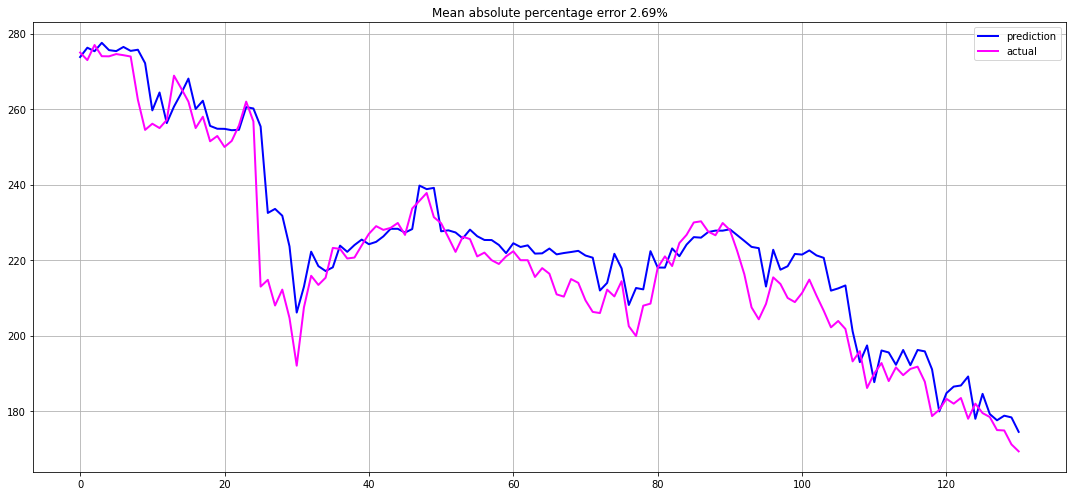

In [ ]:
plotModelResults(xgb2, X_train=X_train, X_test=X_test,plot_intervals=False)
#plotCoefficients(xgb2)

# Random Forest

In [ ]:
features=[features_KB, features_BE, features_rfe_LR, features_base]
mape_min=100000
best_features=0

for i in range(0,len(features)):
  
  X_train=X_train_ori[features[i]]
  X_test=X_test_ori[features[i]]
  RF = RandomForestRegressor(max_depth=50,n_estimators=100, random_state=0)
  RF.fit(X_train, Y_train)
  prediction_RF = RF.predict(X_test)
  mape = mean_absolute_percentage_error(prediction_RF, Y_test)

  if (mape_min>mape):
     mape_min=mape
     best_features=features[i]
     
print(mape_min,best_features)

2.085469356341459 ['Price open', 'lag_bid_1', 'lag_ask_1']


In [ ]:
X_train=X_train_ori[features_rfe_LR]
X_test=X_test_ori[features_rfe_LR]

X_train.head()

,Price open,lag_pl_2,lag_pl_4,lag_bid_1,lag_ask_1,lag_po_1,lag_avg_1,lag_usd_l_1,lag_bid_2,lag_usd_o_2,lag_usd_l_2,lag_brent_o_2,lag_bid_3,lag_ask_3,lag_po_3,lag_avg_3,lag_usd_l_3,lag_brent_l_3,lag_ask_4,lag_max_4,lag_avg_4,Price open abs,Price open/last abs,USD/RUB open/last abs,Brent open abs,Price open rel,Price open/last rel,USD/RUB open rel,USD/RUB open/last rel,Brent open rel,Brent open/last rel,MMVB open rel,MMVB open/last rel
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-24,94.63,93.00,101.0,90.13,90.50,96.00,92.05,24.73,92.98,24.74,24.66,87.38,98.72,98.8,100.50,98.91,24.51,89.23,101.09,102.80,100.76,-1.37,4.13,-0.07,-0.85,0.985729,1.045635,1.001218,0.997169,0.990368,1.009005,0.959744,1.0
2008-01-25,98.00,90.50,98.8,96.48,96.50,94.63,94.55,24.49,90.13,24.63,24.73,88.25,92.98,93.0,86.40,91.46,24.66,88.45,98.80,100.75,98.91,3.37,1.50,-0.03,2.04,1.035612,1.015544,0.991890,0.998775,1.023341,1.004154,1.057986,1.0
2008-01-28,91.00,96.50,93.0,94.26,94.30,98.00,96.21,24.50,96.48,24.66,24.49,87.40,90.13,90.5,96.00,92.05,24.73,86.62,93.00,99.40,91.46,-7.00,-3.30,-0.01,1.26,0.928571,0.965005,1.001226,0.999592,1.014088,0.997800,1.025999,1.0
2008-01-29,91.86,94.30,90.5,89.66,89.70,91.00,90.98,24.48,94.26,24.46,24.50,89.44,96.48,96.5,94.63,94.55,24.49,89.07,90.50,96.89,92.05,0.86,2.33,-0.01,0.85,1.009451,1.026025,0.999183,0.999592,1.009372,1.001860,0.959025,1.0
2008-01-30,93.61,89.53,96.5,94.21,94.47,91.86,92.30,24.49,89.66,24.49,24.48,90.70,94.26,94.3,98.00,96.21,24.50,90.90,96.50,96.85,94.55,1.75,-0.60,-0.01,0.90,1.019051,0.993631,1.000409,0.999592,1.009831,1.004891,1.026349,1.0


In [ ]:
RF = RandomForestRegressor(max_depth=50,n_estimators=100, random_state=0)
RF.fit(X_train, Y_train)

prediction_RF = RF.predict(X_test)

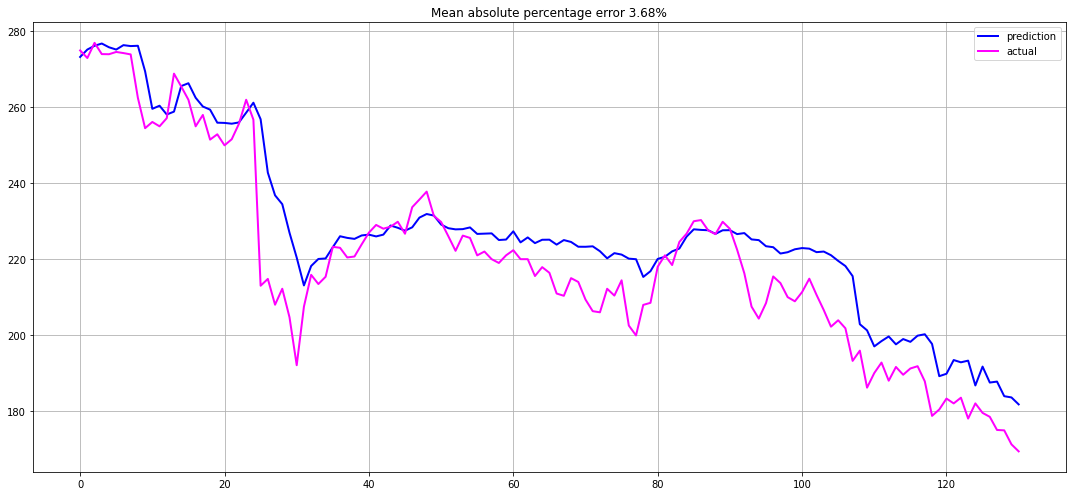

In [ ]:
plotModelResults(RF, X_train=X_train, X_test=X_test,plot_intervals=False)

# LSTM

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
#data3=data3.dropna()
dataset = data2.drop(['Bid','Ask','Price min','Price max','Price avg',' Turnover ','Amount of deals',' MMVB last ',' S&P 500 open ',' S&P 500 last ','USD/RUB last','Brent last'],axis=1)
dataset["lag_pl_{}".format(1)] = data2["Price last"].shift(1)

In [ ]:
dataset=dataset.dropna()
dataset

,USD/RUB open,Brent open,MMVB open,Price open,Price last,lag_pl_1
Date,,,,,,
2008-01-10,24.48,94.49,1906.86,102.23,103.53,101.85
2008-01-11,24.35,92.85,1912.29,103.54,104.70,103.53
2008-01-14,24.37,91.07,1914.48,104.41,105.00,104.70
2008-01-15,24.29,92.90,1931.14,105.35,105.71,105.00
2008-01-16,24.35,90.94,1921.38,104.20,101.80,105.71
...,...,...,...,...,...,...
2020-01-27,62.09,60.23,3123.71,261.00,255.32,265.49
2020-01-28,62.98,59.03,3097.71,257.00,257.70,255.32
2020-01-29,62.28,59.86,3125.91,258.40,259.94,257.70


### Split

In [ ]:
train=dataset[:'2018-02-28']
test=dataset['2018-02-28':'2018-09-11']


print (train.shape, test.shape)

(2386, 6) (132, 6)


In [ ]:
test

,USD/RUB open,Brent open,MMVB open,Price open,Price last,lag_pl_1
Date,,,,,,
2018-02-28,56.28,66.41,2338.3,276.00,272.40,278.21
2018-03-01,56.33,64.57,2286.4,270.98,275.00,272.40
2018-03-02,56.82,64.07,2295.2,274.40,273.00,275.00
2018-03-05,56.81,64.65,2291.9,273.70,277.00,273.00
2018-03-06,56.42,65.74,2312.6,278.50,274.03,277.00
...,...,...,...,...,...,...
2018-09-05,68.12,77.82,2333.0,178.50,178.46,179.50
2018-09-06,68.26,77.02,2320.1,177.25,175.00,178.46
2018-09-07,69.26,76.69,2321.7,175.47,174.90,175.00


In [ ]:
train_X=train.drop(['Price last'],axis=1)
train_Y=train['Price last']

test_X=test.drop(['Price last'],axis=1)
test_Y=test['Price last']

test_Y2=test_Y.copy()

In [ ]:
values_train_X = train_X.values
values_test_X = test_X.values

values_train_Y = train_Y.values
values_test_Y = test_Y.values


# ensure all data is float
values_train_X = values_train_X.astype('float32')
values_test_X = values_test_X.astype('float32')
values_train_Y = values_train_Y.astype('float32')
values_train_Y = values_train_Y.astype('float32')


In [ ]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_X = scaler.fit_transform(values_train_X)
scaled_test_X = scaler.fit_transform(values_test_X)

scaled_train_Y = scaler.fit_transform(values_train_Y.reshape(-1, 1))
scaled_test_Y = scaler.fit_transform(values_test_Y.reshape(-1, 1))

scaled_train_X.shape

(2386, 5)

In [ ]:
scaled_train_Y.shape

(2386, 1)

In [ ]:
# frame as supervised learning
train_X = series_to_supervised(scaled_train_X, 1, 1,dropnan=True)
test_X = series_to_supervised(scaled_test_X, 1, 1,dropnan=True)

train_Y=scaled_train_Y[1:]
test_Y=scaled_test_Y[1:]

#train_Y = train_Y[]
#test_Y = series_to_supervised(scaled_test_Y, 1, 1)

train_X=train_X.values
test_X=test_X.values

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)


(2385, 1, 10) (2385, 1) (131, 1, 10) (131, 1)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2385 samples, validate on 131 samples
Epoch 1/20
2385/2385 - 1s - loss: 0.2250 - val_loss: 0.2832
Epoch 2/20
2385/2385 - 0s - loss: 0.0873 - val_loss: 0.1579
Epoch 3/20
2385/2385 - 0s - loss: 0.0659 - val_loss: 0.1564
Epoch 4/20
2385/2385 - 0s - loss: 0.0518 - val_loss: 0.1413
Epoch 5/20
2385/2385 - 0s - loss: 0.0491 - val_loss: 0.1368
Epoch 6/20
2385/2385 - 0s - loss: 0.0395 - val_loss: 0.1222
Epoch 7/20
2385/2385 - 0s - loss: 0.0393 - val_loss: 0.1164
Epoch 8/20
2385/2385 - 0s - loss: 0.0329 - val_loss: 0.1064
Epoch 9/20
2385/2385 - 0s - loss: 0.0276 - val_loss: 0.0989
Epoch 10/20
2385/2385 - 0s - loss: 0.0256 - val_loss: 0.0903
Epoch 11/20
2385/2385 - 0s - loss: 0.0238 - val_loss: 0.0817
Epoch 12/20
2385/2385 - 0s - loss: 0.0200 - val_loss: 0.0827
Epoch 13/20
2385/2385 - 0s - loss: 0.0223 - val_loss: 0

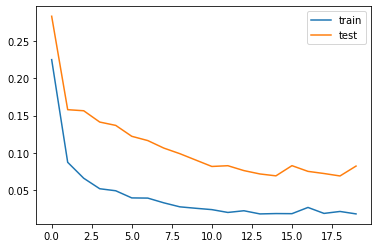

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50,activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_Y, epochs=20, batch_size=100, validation_data=(test_X, test_Y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [ ]:

# make a prediction
preds = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
preds.shape

(131, 1)

In [ ]:
inv_preds=scaler.inverse_transform(preds)
inv_preds.shape

(131, 1)

In [ ]:

test_Y=test_Y2[1:]
test_Y

Date
2018-03-01    275.00
2018-03-02    273.00
2018-03-05    277.00
2018-03-06    274.03
2018-03-07    274.00
               ...  
2018-09-05    178.46
2018-09-06    175.00
2018-09-07    174.90
2018-09-10    171.21
2018-09-11    169.36
Name: Price last, Length: 131, dtype: float64

In [ ]:
# calculate RMSE
rmse_LSTM = sqrt(mean_squared_error(test_Y, inv_preds))
R2_LSTM = r2_score(test_Y, inv_preds)
mae_LSTM = mean_absolute_percentage_error(test_Y.values.reshape(test_Y.size,1), inv_preds)

print('Test RMSE: %.3f' % rmse_LSTM)
print('Test mae: %.3f' % mae_LSTM)
print('Test R2: %.3f' % R2_LSTM)

Test RMSE: 10.657
Test mae: 4.133
Test R2: 0.831


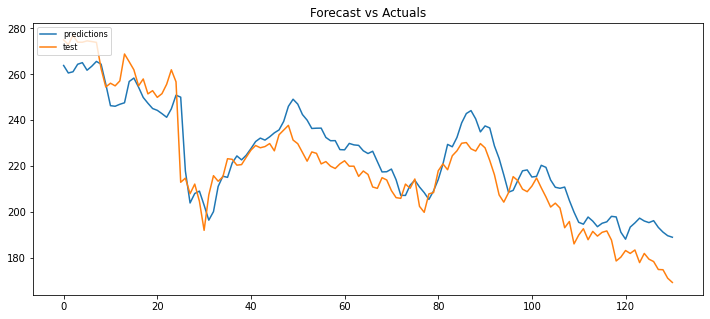

In [ ]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(inv_preds, label='predictions')
plt.plot(test_Y.values, label='test')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
results_LSTM=np.hstack((inv_preds,test_Y.values.reshape(test_Y.size,1)))
results_LSTM=pd.DataFrame(results_LSTM,index=test_Y.index.values, columns=['Predictions','Y_test'])

In [ ]:
results_LSTM.to_csv('results_LSTM.csv')

results_LSTM

,Predictions,Y_test
2018-03-01,263.875000,275.00
2018-03-02,260.611084,273.00
2018-03-05,261.138245,277.00
2018-03-06,264.414703,274.03
2018-03-07,265.103210,274.00
...,...,...
2018-09-05,196.267990,178.46
2018-09-06,193.346191,175.00
2018-09-07,191.282608,174.90
2018-09-10,189.723038,171.21


# Сохранение прогноза

In [ ]:
prediction_lr2=prediction_lr2.reshape(-1,1)
prediction_xgb2=prediction_xgb2.reshape(-1,1)
prediction_RF=prediction_RF.reshape(-1,1)

In [ ]:
results=np.hstack((prediction_lr2,prediction_xgb2,prediction_RF,results_LSTM))
results=results[:,:-1]

In [ ]:
results=pd.DataFrame(results,index=X_test_ori.index.values, columns=['Linear Regression','XGBoost','Random Forest','LSTM'])


In [ ]:
results


,Linear Regression,XGBoost,Random Forest,LSTM
2018-03-01,272.323905,273.814758,273.2720,263.875000
2018-03-02,275.636978,276.283417,275.2293,260.611084
2018-03-05,273.989669,275.353455,276.2198,261.138245
2018-03-06,278.411357,277.576965,276.8192,264.414703
2018-03-07,273.848035,275.643097,275.8268,265.103210
...,...,...,...,...
2018-09-05,178.760331,179.246521,187.4928,196.267990
2018-09-06,177.605883,177.592117,187.7482,193.346191
2018-09-07,175.734347,178.811127,183.8996,191.282608
2018-09-10,175.164870,178.360153,183.5714,189.723038


In [ ]:
results2=results.merge(Y_test,on=X_test.index.values)
results2

,key_0,Linear Regression,XGBoost,Random Forest,LSTM,Price last
0,2018-03-01,272.323905,273.814758,273.2720,263.875000,275.00
1,2018-03-02,275.636978,276.283417,275.2293,260.611084,273.00
2,2018-03-05,273.989669,275.353455,276.2198,261.138245,277.00
3,2018-03-06,278.411357,277.576965,276.8192,264.414703,274.03
4,2018-03-07,273.848035,275.643097,275.8268,265.103210,274.00
...,...,...,...,...,...,...
126,2018-09-05,178.760331,179.246521,187.4928,196.267990,178.46
127,2018-09-06,177.605883,177.592117,187.7482,193.346191,175.00
128,2018-09-07,175.734347,178.811127,183.8996,191.282608,174.90
129,2018-09-10,175.164870,178.360153,183.5714,189.723038,171.21


In [ ]:
results2.to_csv('results.csv')
from google.colab import files
files.download("results.csv")

### Стратегия

In [ ]:
# Создание датафрейма с результатами Linear Regression
df1=data[['Price open','Price last']]
df1= pd.concat([df1,results.iloc[:,0] ], axis=1, join='inner')

# Создание датафрейма с результатами XGBoost
df2=data[['Price open','Price last']]
df2= pd.concat([df2,results.iloc[:,1] ], axis=1, join='inner')

# Создание датафрейма с результатами Random Forest
df3=data[['Price open','Price last']]
df3= pd.concat([df3,results.iloc[:,2] ], axis=1, join='inner')

# Создание датафрейма с результатами LSTM
df4=data[['Price open','Price last']]
df4= pd.concat([df4,results.iloc[:,3]], axis=1, join='inner')


df4



,Price open,Price last,LSTM
2018-03-01,270.98,275.00,263.875000
2018-03-02,274.40,273.00,260.611084
2018-03-05,273.70,277.00,261.138245
2018-03-06,278.50,274.03,264.414703
2018-03-07,272.99,274.00,265.103210
...,...,...,...
2018-09-05,178.50,178.46,196.267990
2018-09-06,177.25,175.00,193.346191
2018-09-07,175.47,174.90,191.282608
2018-09-10,175.03,171.21,189.723038


In [ ]:
df=[df1,df2,df3,df4]
type(df)

list

In [ ]:
df1=df1.reset_index()
df2=df2.reset_index()
df3=df3.reset_index()
df4=df4.reset_index()

df1

,index,Price open,Price last,Linear Regression
0,2018-03-01,270.98,275.00,272.323905
1,2018-03-02,274.40,273.00,275.636978
2,2018-03-05,273.70,277.00,273.989669
3,2018-03-06,278.50,274.03,278.411357
4,2018-03-07,272.99,274.00,273.848035
...,...,...,...,...
126,2018-09-05,178.50,178.46,178.760331
127,2018-09-06,177.25,175.00,177.605883
128,2018-09-07,175.47,174.90,175.734347
129,2018-09-10,175.03,171.21,175.164870


In [ ]:
alpha=[]

for i in np.arange(0, 0.05, 0.001):
    alpha.append(i)
    #print(alpha)


print(alpha)

[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.011, 0.012, 0.013000000000000001, 0.014, 0.015, 0.016, 0.017, 0.018000000000000002, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026000000000000002, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036000000000000004, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043000000000000003, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049]


In [ ]:

def strategy(df,alpha):
  sums=[]

  for j in range(0,len(alpha)):

    for i in range(0,len(df)):

#Ind      
      if (df.iloc[i,3]>df.loc[i,'Price open']*(1+alpha[j])):
        df.loc[i,'Ind']=1
      elif (df.iloc[i,3]<df.loc[i,'Price open']*(1-alpha[j])):
        df.loc[i,'Ind']=-1
      else:
        df.loc[i,'Ind']=0
#Y
      if i==0:
        df.loc[i,'Y']=100000
      else:
        df.loc[i,'Y']=df.loc[i-1,'Sum']   
#N     
      if (df.loc[i,'Ind']==-1):
        credit=df.loc[i,'Y']/0.5
        df.loc[i,'N']=-credit//df.loc[i,'Price open']
      elif (df.loc[i,'Ind']==0):
        df.loc[i,'N']=0
      else:
        df.loc[i,'N']=df.loc[i,'Y']//df.loc[i,'Price open']

#ostatok
      if (df.loc[i,'Ind']==1):
        df.loc[i,'ostatok']=df.loc[i,'Y']-df.loc[i,'Price open']*df.loc[i,'N']
      elif (df.loc[i,'Ind']==-1):
        df.loc[i,'ostatok']=df.loc[i,'Y']+df.loc[i,'Price open']*df.loc[i,'N']
      else:
        df.loc[i,'ostatok']=0


  #income
      if (df.loc[i,'Ind']==0):
        df.loc[i,'income']=0
      elif (df.loc[i,'Ind']==1):
        df.loc[i,'income']=df.loc[i,'Price open']*(-df.loc[i,'N'])+df.loc[i,'Price last']*df.loc[i,'N']
      else:
        df.loc[i,'income']=df.loc[i,'Price last']*df.loc[i,'N']-df.loc[i,'Price open']*df.loc[i,'N']

  #sum
      if (df.loc[i,'Ind']==0):
        df.loc[i,'Sum']=df.loc[i,'Y']
      else:
        df.loc[i,'Sum']=df.loc[i,'income']+df.loc[i,'Y']

    sums.append(df.loc[len(df)-1,'Sum'])

  return df, sums
 

In [ ]:
df1,res1=strategy(df1,alpha)
df2,res2=strategy(df2,alpha)
df3,res3=strategy(df3,alpha)
df4,res4=strategy(df4,alpha)

In [ ]:
res4

[121650.39000000028,
 121650.39000000028,
 118673.60000000022,
 115816.26000000008,
 115816.26000000008,
 115816.26000000008,
 116282.53000000035,
 123641.2400000002,
 123416.07000000036,
 123416.07000000036,
 125038.18000000043,
 126744.51000000039,
 126912.63000000006,
 127407.30000000015,
 125812.81000000016,
 124422.26000000034,
 121235.75000000022,
 120242.9100000003,
 118072.09000000026,
 118974.36000000016,
 77708.20000000014,
 77708.20000000014,
 76263.80000000008,
 77465.80000000012,
 78765.44000000013,
 79806.2300000001,
 81156.28000000014,
 83626.3700000001,
 79676.86000000007,
 76232.76000000004,
 78917.86000000009,
 83550.45000000004,
 73047.04000000011,
 78189.15000000001,
 76744.55000000005,
 77254.81000000003,
 77974.44999999997,
 75923.17999999998,
 72005.30999999994,
 74185.05999999994,
 74584.89999999992,
 83429.67000000004,
 84573.19000000002,
 92363.43,
 94962.74,
 94946.07000000002,
 93438.51999999997,
 92307.34000000001,
 95814.9600000001,
 95605.32000000005]

In [ ]:
n=100000//df1.loc[0,'Price open']
base_sum=n*df1.loc[len(df1)-1,'Price last']
base_sums=[base_sum for j in range(0,len(alpha))]
base_sums

[62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000000004,
 62493.840000

In [ ]:
# Формируем таблицу с результатами
strategy_results = pd.DataFrame(list(zip(alpha,base_sums,res1, res2,res3,res4)), columns =['alpha', 'Baseline','Linear Regression','XGBoost','Random Forest','LSTM'])
strategy_results=strategy_results.T
strategy_results

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
alpha,0.00,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.021,0.022,0.023,0.024,0.025,0.026,0.027,0.028,0.029,0.03,0.031,0.032,0.033,0.034,0.035,0.036,0.037,0.038,0.039,0.04,0.041,0.042,0.043,0.044,0.045,0.046,0.047,0.048,0.049
Baseline,62493.84,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.84,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.84,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.84,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.84,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840,62493.840
Linear Regression,73480.29,83676.580,83458.240,94398.880,100783.700,102891.280,103902.200,101683.880,100000.000,100000.000,100000.00,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.00,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.00,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.00,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
XGBoost,92997.81,94496.510,106096.810,99278.950,98419.840,98117.670,99031.810,100809.000,94842.440,91892.290,86326.60,84605.300,83580.590,85691.750,84881.530,93446.940,90593.880,90511.030,96040.370,95112.270,98624.70,98255.620,94655.070,95413.010,94852.450,98368.970,101841.700,103077.830,103077.830,103077.830,101728.43,100597.210,100597.210,100597.210,101873.530,107555.590,106725.490,108188.070,102767.200,102767.200,103480.94,103480.940,103480.940,103480.940,103480.940,107419.200,107419.200,107419.200,107419.200,111983.640
Random Forest,77207.05,81805.910,77550.630,81963.980,78369.710,79281.920,77813.760,74349.300,86336.340,80488.780,81950.29,81049.200,84272.020,85472.050,86076.130,86599.850,87338.930,82729.840,83039.170,83291.710,85962.60,86996.990,89269.640,87686.220,87686.220,87511.870,83215.300,82580.290,82580.290,84395.780,84395.78,81845.320,81845.320,81845.320,81845.320,81845.320,81845.320,83790.710,90320.630,94404.870,96064.30,98541.240,98541.240,97681.920,100362.270,97176.900,93665.120,97140.410,93621.310,101244.810
LSTM,121650.39,121650.390,118673.600,115816.260,115816.260,115816.260,116282.530,123641.240,123416.070,123416.070,125038.18,126744.510,126912.630,127407.300,125812.810,124422.260,121235.750,120242.910,118072.090,118974.360,77708.20,77708.200,76263.800,77465.800,78765.440,79806.230,81156.280,83626.370,79676.860,76232.760,78917.86,83550.450,73047.040,78189.150,76744.550,77254.810,77974.450,75923.180,72005.310,74185.060,74584.90,83429.670,84573.190,92363.430,94962.740,94946.070,93438.520,92307.340,95814.960,95605.320


In [ ]:
strategy_results.to_csv('strategy_results.csv')
from google.colab import files
files.download("strategy_results.csv")

# Метрики качества

In [ ]:
mae1 = mean_absolute_percentage_error(results2['Linear Regression'],results2['Price last'])
mae2 = mean_absolute_percentage_error(results2['XGBoost'],results2['Price last'])
mae3 = mean_absolute_percentage_error(results2['Random Forest'],results2['Price last'])

R2_1 = r2_score(results2['Linear Regression'],results2['Price last'])
R2_2 = r2_score(results2['XGBoost'],results2['Price last'])
R2_3 = r2_score(results2['Random Forest'],results2['Price last'])

RMSE1=sqrt(mean_squared_error(results2['Linear Regression'],results2['Price last']))
RMSE2=sqrt(mean_squared_error(results2['XGBoost'],results2['Price last']))
RMSE3=sqrt(mean_squared_error(results2['Random Forest'],results2['Price last']))

In [ ]:
col1=['Linear Regression','XGBoost','Random Forest','LSTM']
col2=[mae1,mae2,mae3,mae_LSTM]
col3=[R2_1,R2_2,R2_3,R2_LSTM]
col4=[RMSE1,RMSE2,RMSE3,rmse_LSTM]

metrics=pd.DataFrame({'Model':col1,'MAPE':col2,'R2':col3,'RMSE':col4})
metrics.head()

,Model,MAPE,R2,RMSE
0,Linear Regression,1.628613,0.954474,5.547207
1,XGBoost,2.691405,0.888428,8.356904
2,Random Forest,3.683404,0.776037,10.844693
3,LSTM,4.133373,0.831100,10.656819


In [ ]:
metrics.to_csv('metrics.csv')

In [ ]:
from google.colab import files
files.download("metrics.csv")